In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mailtestset1/MAIL_test.csv
/kaggle/input/mailset/MAIL.csv


In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('/kaggle/input/mailset/MAIL.csv',header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.0,-1.00,-1.000000,-1.0,-1.00000,-1.000000,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.0,-1.00,-1.000000,-1.0,-0.82691,-0.632182,-1.0,-1.0,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.0,-0.84,-0.820690,-1.0,-1.00000,-1.000000,-1.0,-1.0,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.0,-1.00,-0.886152,-1.0,-1.00000,-0.796825,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.0,-1.00,-0.774452,-1.0,-1.00000,-0.798742,-1.0,-1.0,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0


In [35]:
df.shape

(3587, 401)

In [36]:
df.isnull().sum(axis=0)

0      0
1      0
2      0
3      0
4      0
      ..
396    0
397    0
398    0
399    0
400    0
Length: 401, dtype: int64

In [37]:
l_class = np.unique(df[0])
l_class

array([0, 1])

In [38]:
l_value = [sum(df[0] == l_class[0]),sum(df[0] == l_class[1])]
l_value

[1204, 2383]

In [39]:
y = df[0].values
X = df.drop([0],axis=1).values

In [40]:
X.shape

(3587, 400)

In [41]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res,y_res = sm.fit_resample(X,y)

allclass = np.unique(y_res)
allclassnumber = [sum(y_res==eachclass) for eachclass in allclass]
allclassnumber

[2383, 2383]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [44]:
from sklearn.decomposition import PCA
fr = PCA(n_components=40)
fr.fit(X_train)
X_train = fr.transform(X_train)
X_val = fr.transform(X_val)
X_test = fr.transform(X_test)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [46]:
X_train_norm.shape

(3049, 40)

In [47]:
X_val_norm.shape

(763, 40)

In [48]:
X_test_norm.shape

(954, 40)

In [49]:
y_train.shape

(3049,)

In [50]:
y_val.shape

(763,)

In [51]:
import tensorflow as tf

In [52]:
tf.compat.v1.reset_default_graph() # Clear Model : เคลียร์ memory , รันบน tensorflow V.1 
np.random.seed(1) # Fix Randomness
tf.compat.v1.random.set_random_seed(1) # Fix Randomness
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(60, activation='relu', input_shape=(40,)), ## Feature ปัจจุบันมี 14 Feature ,Hidden Fuction มี 16 
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dropout(0.4),  
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dropout(0.4),  
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1, activation='sigmoid') ## ข้อมูลทางด้านการแพทย์ มีคำตอบค่ ใช่ หรือ ไม่ใช่ เลยใช้ Sigmoid    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2460      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
train_acc = list()
val_acc = list()
for i in range(0,1000):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 500 , validation_data= (X_val_norm, y_val)) ## Batch Size : แบ่งให้โมเดลเรียนรู้ทีละกี่ DATA
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

7/7 [==============================] - 0s 10ms/step - loss: 0.5210 - accuracy: 0.7409 - val_loss: 0.5457 - val_accuracy: 0.7130


7/7 [==============================] - 0s 11ms/step - loss: 0.4739 - accuracy: 0.7878 - val_loss: 0.5134 - val_accuracy: 0.7326


7/7 [==============================] - 0s 10ms/step - loss: 0.4421 - accuracy: 0.7953 - val_loss: 0.5076 - val_accuracy: 0.7405


7/7 [==============================] - 0s 10ms/step - loss: 0.4062 - accuracy: 0.8196 - val_loss: 0.5041 - val_accuracy: 0.7562


7/7 [==============================] - 0s 10ms/step - loss: 0.3963 - accuracy: 0.8232 - val_loss: 0.5097 - val_accuracy: 0.7602


7/7 [==============================] - 0s 10ms/step - loss: 0.3569 - accuracy: 0.8452 - val_loss: 0.5088 - val_accuracy: 0.7706


7/7 [==============================] - 0s 12ms/step - loss: 0.3495 - accuracy: 0.8478 - val_loss: 0.5102 - val_accuracy: 0.7706


7/7 [==============================] - 0s 10ms/step - loss: 0.3222 - accuracy: 0.8645 - val_loss: 0.5352 - val_accuracy: 0.7667


7/7 [==============================] - 0s 10ms/step - loss: 0.3038 - accuracy: 0.8691 - val_loss: 0.5073 - val_accuracy: 0.7733


7/7 [==============================] - 0s 11ms/step - loss: 0.3104 - accuracy: 0.8649 - val_loss: 0.5245 - val_accuracy: 0.7759


7/7 [==============================] - 0s 10ms/step - loss: 0.2985 - accuracy: 0.8777 - val_loss: 0.5480 - val_accuracy: 0.7523


7/7 [==============================] - 0s 10ms/step - loss: 0.2889 - accuracy: 0.8813 - val_loss: 0.5299 - val_accuracy: 0.7693


7/7 [==============================] - 0s 10ms/step - loss: 0.2763 - accuracy: 0.8898 - val_loss: 0.5214 - val_accuracy: 0.7824


7/7 [==============================] - 0s 10ms/step - loss: 0.2772 - accuracy: 0.8918 - val_loss: 0.5455 - val_accuracy: 0.7785


7/7 [==============================] - 0s 10ms/step - loss: 0.2452 - accuracy: 0.9052 - val_loss: 0.5590 - val_accuracy: 0.7720


7/7 [==============================] - 0s 10ms/step - loss: 0.2633 - accuracy: 0.8921 - val_loss: 0.5625 - val_accuracy: 0.7706


In [55]:
history.history

{'loss': [0.2633483111858368],
 'accuracy': [0.8920957446098328],
 'val_loss': [0.5624910593032837],
 'val_accuracy': [0.7706422209739685]}

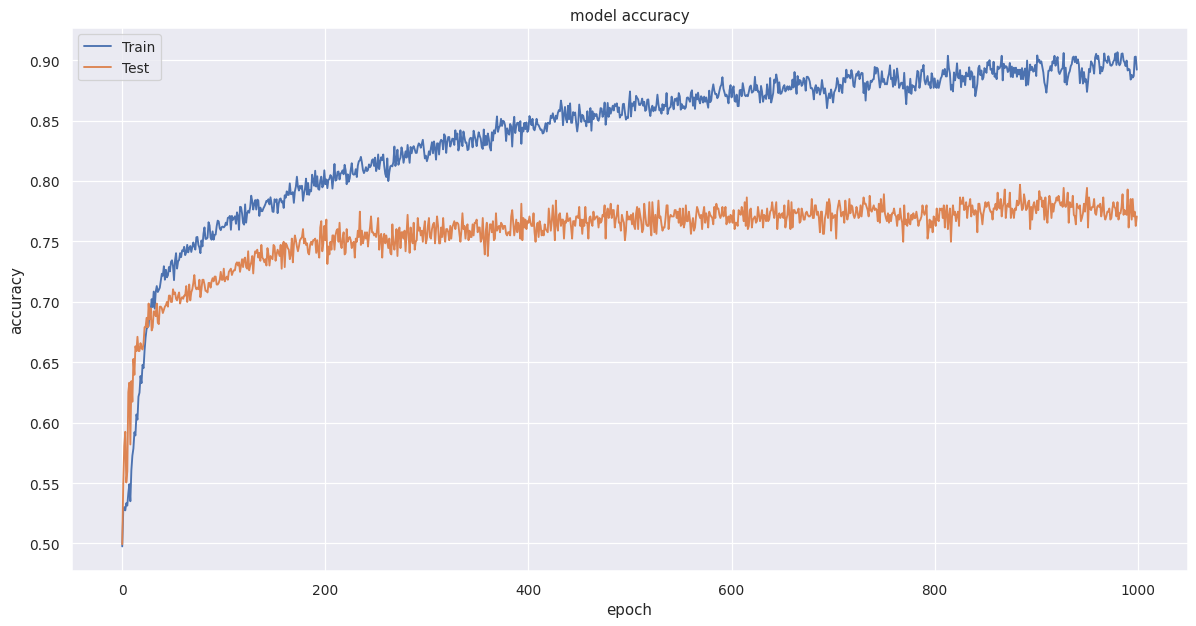

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [57]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.810272536687631

In [58]:
df_test = pd.read_csv('/kaggle/input/mailtestset1/MAIL_test.csv',header= None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.0,-1.000000,-0.792705,-1.000000,-1.000000,-1.000000,-0.421965,-1.00000,-1.000000,...,-1.0,-1.0,-0.088486,-1.000000,-0.903030,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,0,-1.0,-0.941068,-0.735823,-0.791284,-0.833604,-0.882136,-1.000000,-0.73849,-0.865562,...,-1.0,-1.0,-0.859439,-0.970093,-0.970093,-0.574766,-0.715888,-0.891589,-0.837383,-1.0
2,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.703353,-1.000000,-0.936884,-0.461539,-0.850098,-0.771204,-1.000000,-1.0
3,0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.729497,-0.884892,-0.769784,-1.000000,-0.453238,-0.582735,-1.000000,-1.0
4,0,-1.0,-1.000000,-0.728317,-1.000000,-0.315508,-0.515152,-1.000000,-1.00000,-1.000000,...,-1.0,-1.0,-0.090325,-1.000000,-0.741936,-1.000000,0.225804,-1.000000,-1.000000,-1.0


In [59]:
yt = df[0].values
Xt = df.drop([0],axis=1).values

In [60]:
X_test = fr.transform(Xt)

In [61]:
X_test_norm = scaler.transform(X_test)

In [62]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == yt)/len(yt)

0.8804014496793978